In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
def LIF(I, Cm, Rm):
    #I: input current array
    #Cm: constant capitance
    #Rm: resistance parameter
    Vt=30  
    V_r = -65 # resting voltage
    spike=80
    T = 0.100
    dt = 0.00002
    # an array of time
    time = np.arange(0, T+dt, dt)
    
    
    V = np.empty(len(time))         # Voltage array
    V[0] = V_r                      # set initial to resting potential
    indicator=False                 # count spikes to get firing rate
    LIF.spikes=0                    
    
    for i in range(1, len(time)):
        # using "I - V(t)/Rm = Cm * dV/dT"
        dV =  (I[i] - (V[i-1]-V_r)/Rm)/Cm
        if indicator==True:
            V[i] = V_r + dV*dt
        else:
            V[i] = V[i-1] + dV*dt
        indicator=False

        # when exceed threshold
        if V[i] > Vt:
            V[i] = spike   # set the last step to spike value
            LIF.spikes=LIF.spikes+1
            if i != len(time): 
                V[i+1] = V_r       # current step is resting membrane potential
                indicator= True
    return V

### Question 3.1
Plotting LIF nueron model:

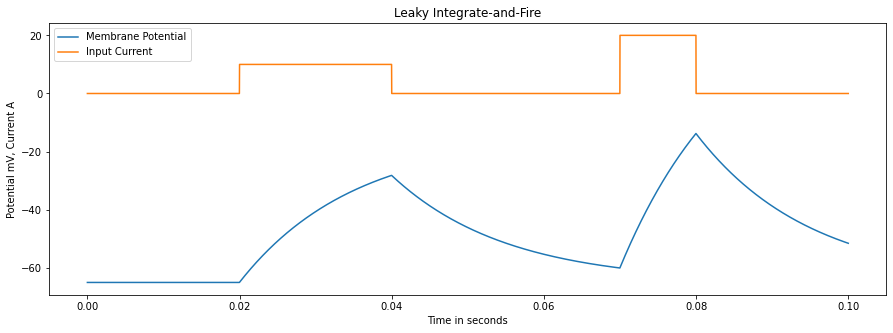

In [49]:
#input to show potential decay over time

#input current array
T = 0.100                      
dt  = 0.00002                   
time = np.arange(0, T+dt, dt) 
I = np.zeros(len(time))
I[1000:2000] = 10
I[3500:4000]= 20     


V = LIF(I=I, Cm=0.003,Rm=5)

fig = plt.figure("LIF nueron", figsize=(15, 5))
ax = fig.add_subplot(111)
plt.title("Leaky Integrate-and-Fire")


lineV = plt.plot(time, V, label="Membrane Potential")[0]
lineI = plt.plot(time, I, label="Input Current")[0]

plt.legend(loc="upper left")

# add axis labels
plt.ylabel("Potential mV, Current A")
plt.xlabel("Time in seconds")

plt.show()

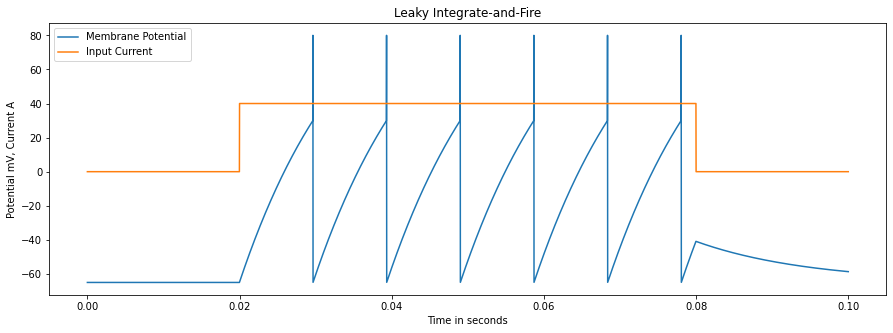

In [80]:
#input to show spiking behaviour

#input current array
T = 0.100                      
dt  = 0.00002                   
time = np.arange(0, T+dt, dt) 
I = np.zeros(len(time))
I[1000:4000] = 40  


V = LIF(I=I, Cm=0.003,Rm=5)

fig = plt.figure("LIF nueron", figsize=(15, 5))
ax = fig.add_subplot(111)
plt.title("Leaky Integrate-and-Fire")


lineV = plt.plot(time, V, label="Membrane Potential")[0]
lineI = plt.plot(time, I, label="Input Current")[0]

plt.legend(loc="upper left")

# add axis labels
plt.ylabel("Potential mV, Current A")
plt.xlabel("Time in seconds")

plt.show()


### Question 3.2
Plotting spike rate with input current

Text(0, 0.5, 'spikes per second')

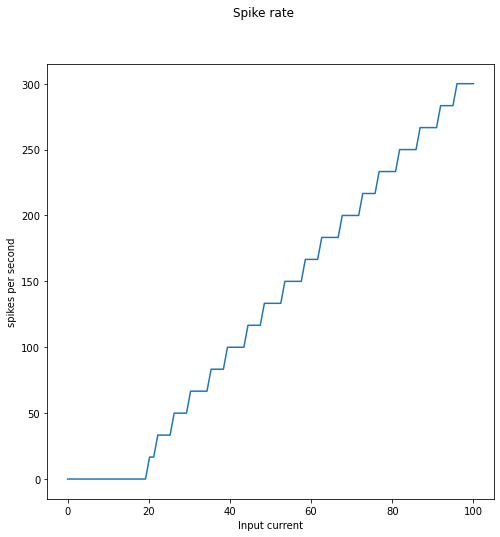

In [82]:
#Question 3.2
#input current from 0-100
Input_Current=np.linspace(0,100,100)
Y=np.empty(Input_Current.size)
for i in range(Input_Current.size):
    T = 0.100                      
    dt  = 0.00002                   
    time = np.arange(0, T+dt, dt) 
    I = np.zeros(len(time))
    I[1000:4000] =  Input_Current[i]
    LIF(I=I, Cm=0.003,Rm=5)
    Y[i]=LIF.spikes/(time[4000]-time[1000])

fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle("Spike rate")
plt.plot(Input_Current,Y)
plt.xlabel("Input current")
plt.ylabel("spikes per second")

### Question 3.3
Answer: As input current increases, the firing rate also increases since the currents would make the voltage reach the threshold faster.